In [84]:
import pandas as pd
from deepface import DeepFace

In [85]:
df = pd.read_csv('../../dataset/Labeled Faces in the University Students Dataset/master.csv')
df.head()

,file_x,file_y,Decision
0,1.jpg,2.jpg,No
1,1.jpg,3.jpg,No
2,1.jpg,32.jpg,Yes
3,2.jpg,3.jpg,No
4,2.jpg,33.jpg,Yes


In [86]:
df['file_x'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_y'].astype(str)

In [87]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/2.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/32.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/33.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/5.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/3.jpg',
  '../../dataset/Labeled Faces

In [88]:
model_name = "Facenet"
distance_metric = "cosine"

In [89]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 44/44 [23:38<00:00, 32.25s/it]


In [90]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [91]:
df["distance"] = distances
df.head()

,file_x,file_y,Decision,distance
0,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.8721
1,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.6943
2,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,-0.0000
3,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.7283
4,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000


<AxesSubplot:ylabel='Density'>

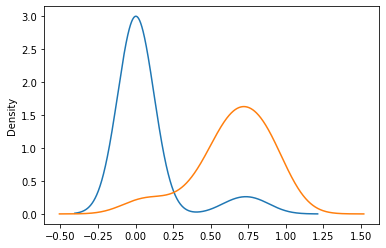

In [92]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [93]:
from chefboost import Chefboost as chef

In [94]:
config = {'algorithm': 'C4.5'}

In [95]:
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.6198208332061768  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.63636363636364 % on  44  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[20, 2], [3, 19]]
Precision:  90.9091 %, Recall:  86.9565 %, F1:  88.8889 %


In [96]:
threshold = 0.3749 #comes from c4.5 algorithm

In [97]:
df["prediction"] = "No"

In [98]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [99]:
df.sample(5)

,file_x,file_y,Decision,distance,prediction
2,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,-0.0000,Yes
0,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.8721,No
32,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.6603,No
34,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.6480,No
31,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.6308,No


In [100]:
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [101]:
cm = confusion_matrix(df.Decision.values, df.prediction.values)

In [102]:
tn, fp, fn, tp = cm.ravel()

In [103]:
tn, fp, fn, tp

(20, 3, 2, 19)

In [104]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [105]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  86.36363636363636 %
Recall:  90.47619047619048 %
F1 score  88.37209302325581 %
Accuracy:  88.63636363636364 %


In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
df["p"] = "No"
roc_point=[]

In [113]:
thresholds = list(np.array(list(range(1,100,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])
roc_point

[[0.7142857142857143, 0.9375],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.95],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.9047619047619048, 0.9047619047619048],
 [0.904761904761904

In [114]:
pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
pivot["threshold"] = thresholds
pivot                    

,tpr,fpr,threshold
0,0.714286,0.937500,0.01
1,0.904762,0.950000,0.02
2,0.904762,0.950000,0.03
3,0.904762,0.950000,0.04
4,0.904762,0.950000,0.05
...,...,...,...
94,1.000000,0.500000,0.95
95,1.000000,0.488372,0.96
96,1.000000,0.488372,0.97
97,1.000000,0.488372,0.98


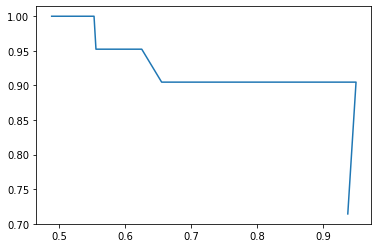

In [115]:
plt.plot(pivot.fpr,pivot.tpr)